In [45]:
# importing all the required python libraries & packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from datetime import date, datetime

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
# Importing & reading the main dataset
df = pd.read_csv('Data/curated_data.csv')
df.head()

,Date,data1,data2,data3,Website units sold,FB_Ad _spend,FB_Impressions,FB_Unique Clicks,Day,Month,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Amazon Page Views,Amazon Sessions,Amazon Units Sold
0,5/3/22,NaN,NaN,NaN,13.0,540.45,38915,208,3.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,487,365,52.0
1,5/4/22,NaN,NaN,NaN,16.0,548.41,42258,192,4.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,439,308,50.0
2,5/5/22,NaN,NaN,NaN,7.0,285.47,21238,96,5.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,357,277,38.0
3,5/6/22,NaN,NaN,NaN,0.0,0,0,0,6.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,370,264,27.0
4,5/7/22,NaN,NaN,NaN,1.0,56.12,4253,9,7.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,306,231,32.0


In [48]:
df.shape

(855, 23)

We can notice that we have blank columns and checked for duplicates

In [49]:
df = df.drop(columns=['data1','data2','data3'])

In [50]:
df.drop_duplicates(keep=False)

,Date,Website units sold,FB_Ad _spend,FB_Impressions,FB_Unique Clicks,Day,Month,Year,day of the week,quarter,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Amazon Page Views,Amazon Sessions,Amazon Units Sold
0,5/3/22,13.0,540.45,38915,208,3.0,5.0,2022.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,487,365,52.0
1,5/4/22,16.0,548.41,42258,192,4.0,5.0,2022.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,439,308,50.0
2,5/5/22,7.0,285.47,21238,96,5.0,5.0,2022.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,357,277,38.0
3,5/6/22,0.0,0,0,0,6.0,5.0,2022.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,370,264,27.0
4,5/7/22,1.0,56.12,4253,9,7.0,5.0,2022.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,306,231,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2/10/23,107.0,2464.18,163244,1011,10.0,2.0,2023.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,156.0
284,2/11/23,98.0,2381.72,140133,1036,11.0,2.0,2023.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,964,733,123.0
285,2/12/23,84.0,1809.46,91056,706,12.0,2.0,2023.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,911,674,117.0
286,2/13/23,66.0,1622.82,101713,697,13.0,2.0,2023.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,934,710,137.0


In [51]:
df = df.fillna(0)
df.isna().sum
df.isnull.values.any()

AttributeError: 'function' object has no attribute 'values'

The data looks clean. Let's check the info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                855 non-null    object 
 1   Website units sold  855 non-null    float64
 2   FB_Ad _spend        855 non-null    object 
 3   FB_Impressions      855 non-null    object 
 4   FB_Unique Clicks    855 non-null    object 
 5   Day                 855 non-null    float64
 6   Month               855 non-null    float64
 7   Year                855 non-null    float64
 8   day of the week     855 non-null    float64
 9   quarter             855 non-null    float64
 10  Monday              855 non-null    float64
 11  Tuesday             855 non-null    float64
 12  Wednesday           855 non-null    float64
 13  Thursday            855 non-null    float64
 14  Friday              855 non-null    float64
 15  Saturday            855 non-null    float64
 16  Sunday  

Date is an object but since the curated data already has the fragmented date columns we can drop it. 

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.drop(columns=['Date'])


In [ ]:
df['Amazon Page Views'] = df['Amazon Page Views'].str.replace(',','').astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Website units sold  855 non-null    float64
 1   FB_Ad _spend        855 non-null    object 
 2   FB_Impressions      855 non-null    object 
 3   FB_Unique Clicks    855 non-null    object 
 4   Day                 855 non-null    float64
 5   Month               855 non-null    float64
 6   Year                855 non-null    float64
 7   day of the week     855 non-null    float64
 8   quarter             855 non-null    float64
 9   Monday              855 non-null    float64
 10  Tuesday             855 non-null    float64
 11  Wednesday           855 non-null    float64
 12  Thursday            855 non-null    float64
 13  Friday              855 non-null    float64
 14  Saturday            855 non-null    float64
 15  Sunday              855 non-null    float64
 16  Amazon P

In [ ]:

df['Amazon Sessions'] = df['Amazon Sessions'].str.replace(',','').astype(float)
df['FB_Ad _spend'] = df['FB_Ad _spend'].str.replace(',','').astype(float)
df['FB_Impressions'] = df['FB_Impressions'].str.replace(',','').astype(float)
df['FB_Unique Clicks'] = df['FB_Unique Clicks'].str.replace(',','').astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Website units sold  855 non-null    float64
 1   FB_Ad _spend        253 non-null    float64
 2   FB_Impressions      253 non-null    float64
 3   FB_Unique Clicks    252 non-null    float64
 4   Day                 855 non-null    float64
 5   Month               855 non-null    float64
 6   Year                855 non-null    float64
 7   day of the week     855 non-null    float64
 8   quarter             855 non-null    float64
 9   Monday              855 non-null    float64
 10  Tuesday             855 non-null    float64
 11  Wednesday           855 non-null    float64
 12  Thursday            855 non-null    float64
 13  Friday              855 non-null    float64
 14  Saturday            855 non-null    float64
 15  Sunday              855 non-null    float64
 16  Amazon P

EXPLORATORY DATA ANALYSIS


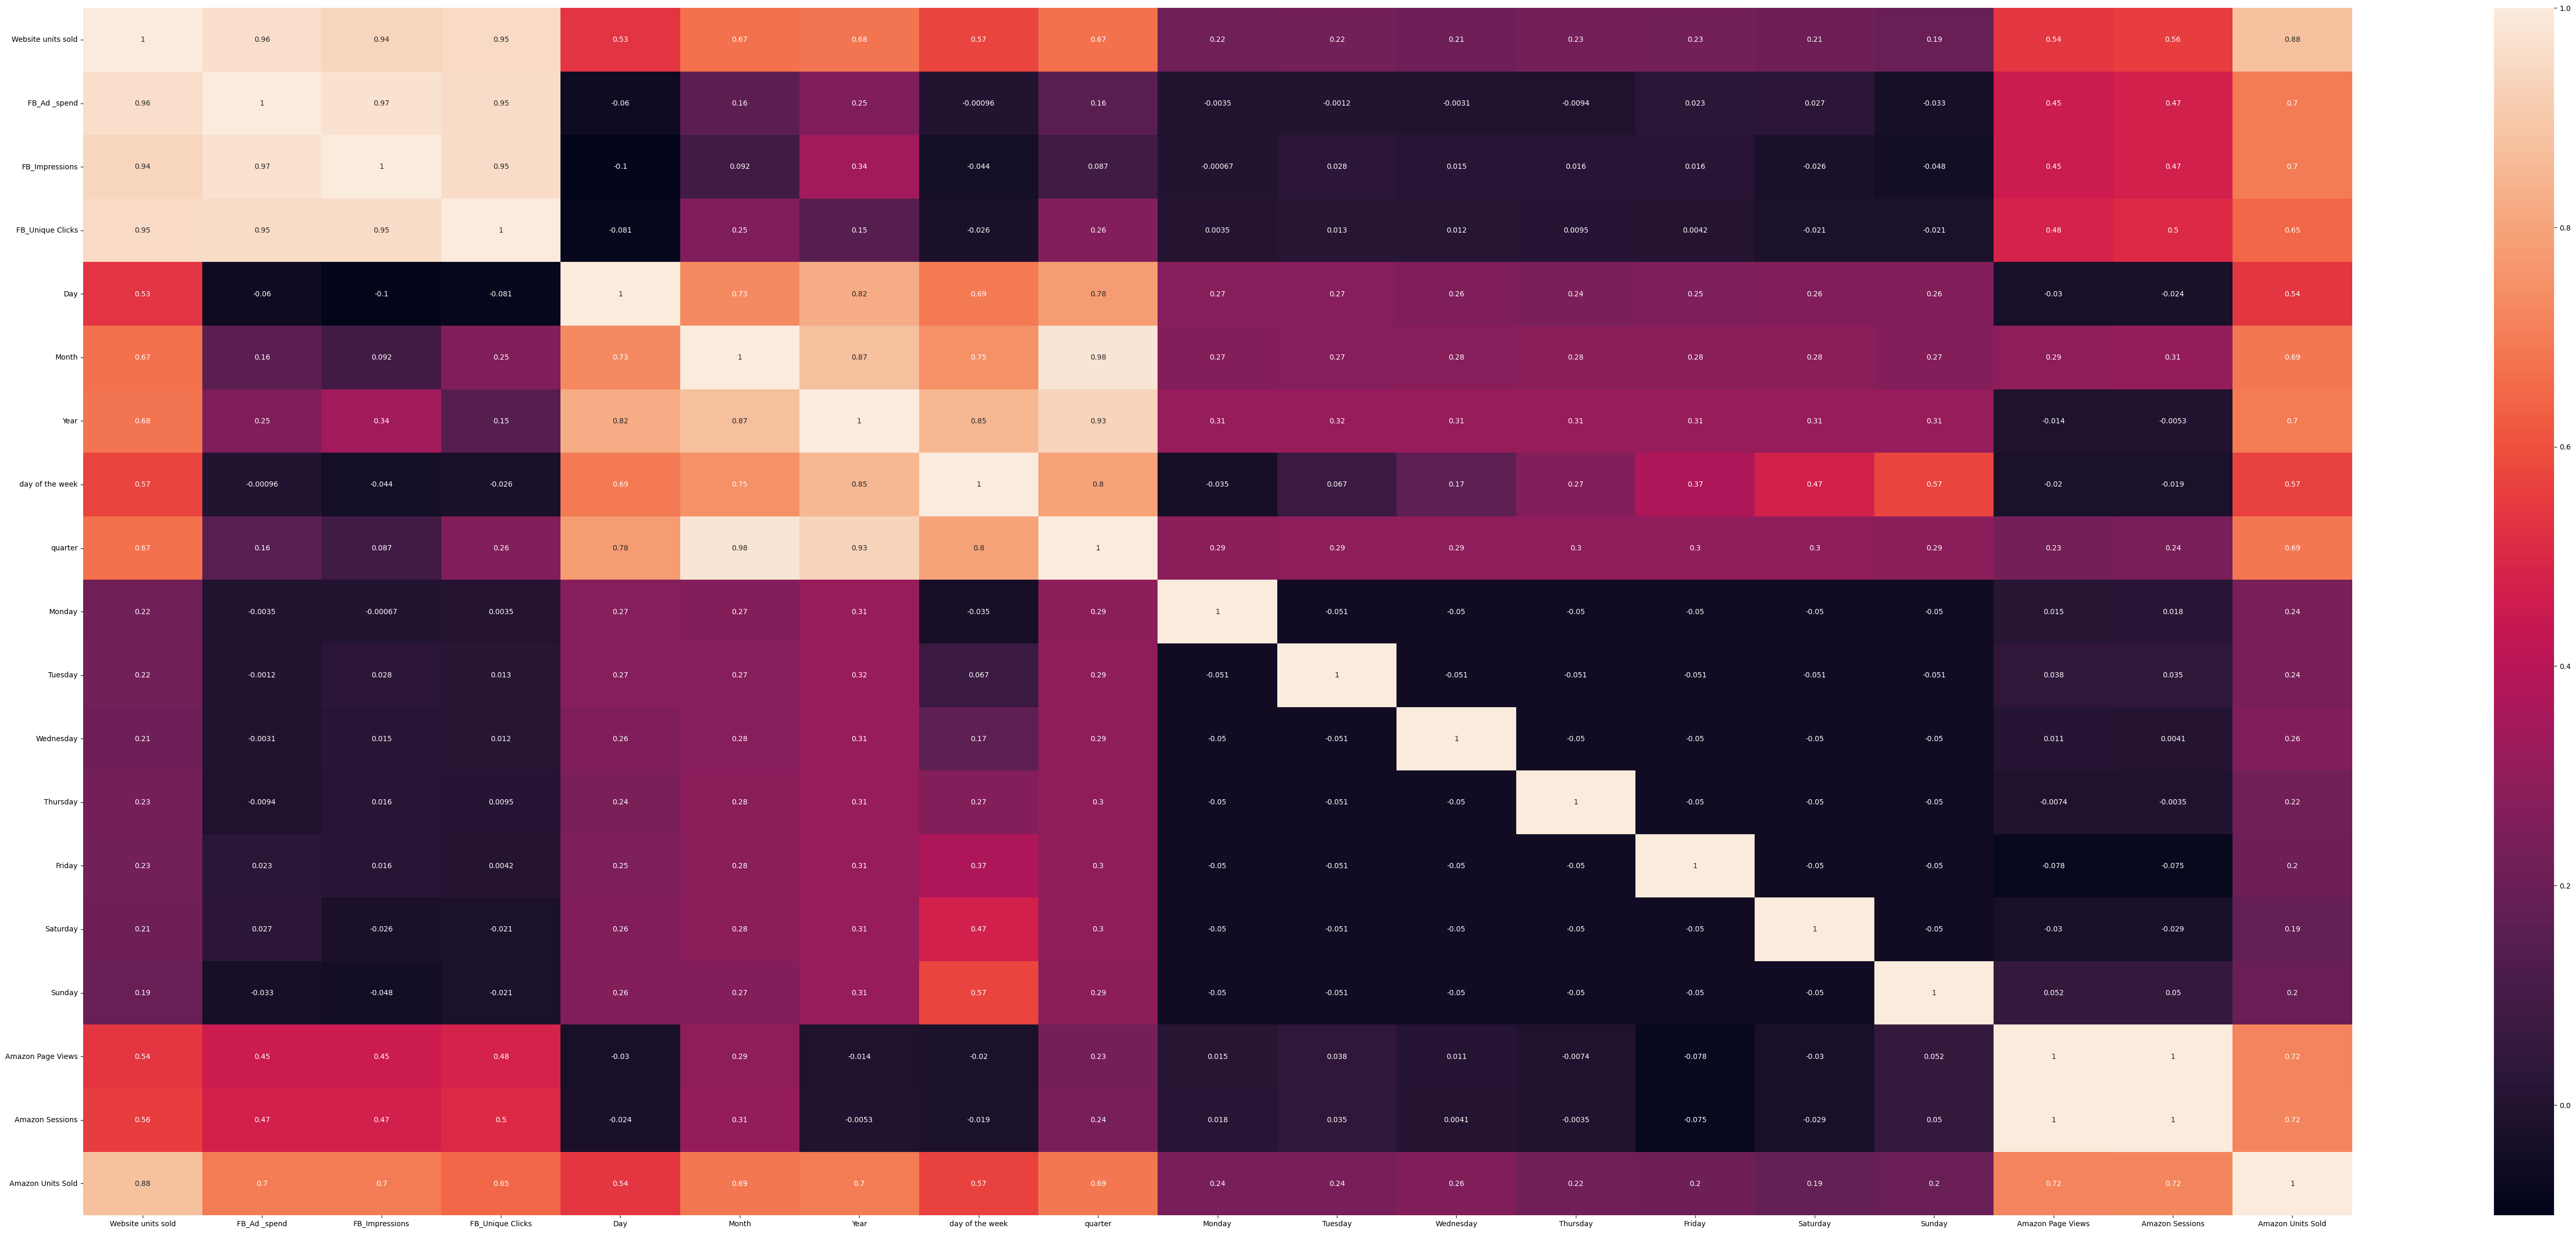

In [ ]:
plt.figure(figsize= (70,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

Amazon sales  has a high correlation with fb spend/impression/clicks and also Amazon clicks/impressions

Let's check the scatterplot as well

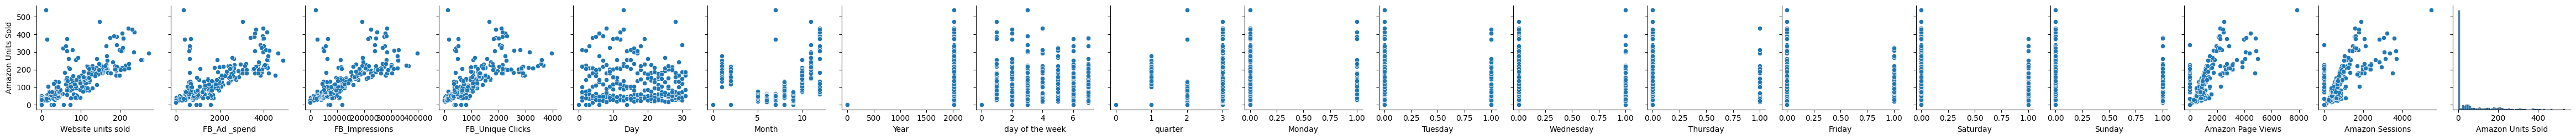

In [ ]:
sns.pairplot(df,kind = "scatter",y_vars='Amazon Units Sold',aspect=1)

It reinstates the fact we learned.

In [ ]:
feature = df.columns
feature.drop('Amazon Units Sold')
#feature = ['Website_units_sold','FB_Ad_spend','FB_Impressions','FB_Unique Clicks','Day','Month','Year','day of the week','quarter','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Amazon Page Views','Amazon Sessions']
x = df[feature]
y = df['Amazon Units Sold']

In [ ]:
mlr = LinearRegression()
mlr.fit(x,y)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values